In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
# Load bias
SparkMetaBias = pd.read_csv("dat/bias2/ASD.Meta.avgZ.bias.csv")
#SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

In [5]:
# Load Connectome and Weights
adj_mat = pd.read_csv(ConnFil, index_col=0)
g = LoadConnectome2(adj_mat) # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()

adj_mat_Hippomask = pd.read_csv("../dat/allen-mouse-conn/adj_mat.hippo_mask.csv", index_col=0)
g_hippomask = LoadConnectome2(adj_mat_Hippomask)
InfoDict = pk.load(open("dat/EdgeDict_selfInfo.pk", 'rb'))

In [6]:
def xxZscoreEveryStartSize(ASD_BiasDF, g_conn, WeightDict, file_hand, Start_sizes=np.arange(10, 215, 5)):
    ASD_Cohes_info, ASD_Conns_info = [], []
    Sib_Cohes_info, Sib_Conns_info = [], []
    for topN in Start_sizes:
        print(topN)
        CirSTRs, cohe, conn = GreedyTrim(ASD_BiasDF, g_conn, topN, WeightDict)
        ASD_Cohes_info.append(cohe)
        ASD_Conns_info.append(conn)
        sib_hand = open(file_hand.format(topN))
        _sib_Cohes, _sib_Conns = [], []
        for l in sib_hand.readlines():
            sib_strs = l.split(",")
            sib_cohe, sib_conn = ScoreSTRSet(g_conn, sib_strs, WeightDict, Weighted=True, Direction=False)
            _sib_Cohes.append(sib_cohe)
            _sib_Conns.append(sib_conn)
        Sib_Cohes_info.append(_sib_Cohes)
        Sib_Conns_info.append(_sib_Conns)
    Sib_Cohes_info = np.array(Sib_Cohes_info)
    Sib_Conns_info = np.array(Sib_Conns_info)
    return np.array(ASD_Cohes_info), np.array(ASD_Conns_info), Sib_Cohes_info, Sib_Conns_info

In [7]:
# First Round
hand = "dat/SibTrimCir/xx_info_top_{}_circuit_strs.txt"
weightdict = InfoDict
ASD_Cohes_info1, ASD_Conns_info1, Sib_Cohes_info1, Sib_Conns_info1 = xxZscoreEveryStartSize(SparkMetaBias, 
                                                        g, weightdict, hand)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210


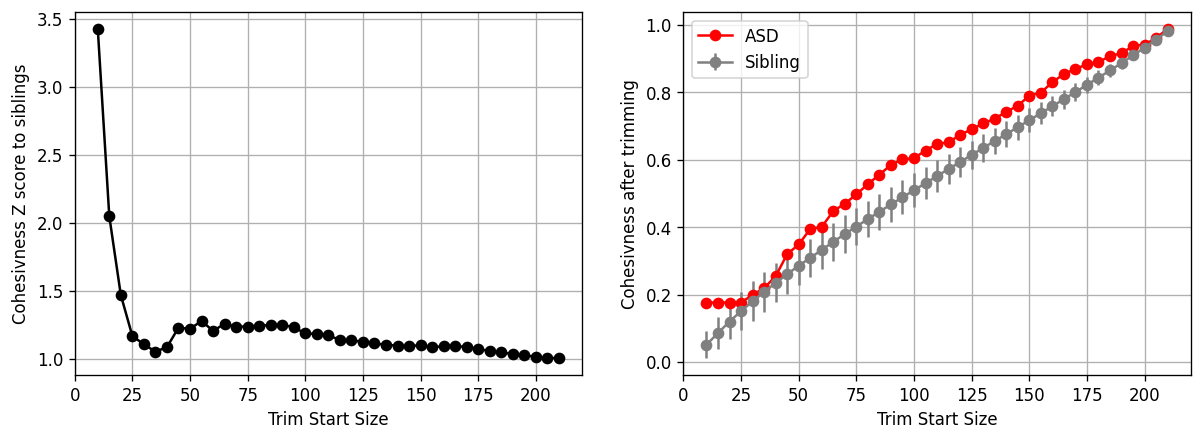

In [10]:
sibxx = [np.mean(x) for x in Sib_Cohes_info1]
yerr = [np.std(x) for x in Sib_Cohes_info1]
Zscores = []
for i, topN in enumerate(range(10, 215, 5)):
    Z, P = GetPermutationP(Sib_Cohes_info1[i], ASD_Cohes_info1[i])
    Zscores.append(Z)
ASD_Cohes_info1 = np.array(ASD_Cohes_info1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(range(10, 215, 5), ASD_Cohes_info1/sibxx, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings")
ax2.plot(range(10, 215, 5), ASD_Cohes_info1, marker="o", color="red", label="ASD")
ax2.errorbar(range(10, 215, 5), sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")
ax1.grid(True)
ax2.grid(True)

In [16]:
print(np.argmax(ASD_Cohes_info1/sibxx))

0


In [34]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 20, InfoDict)
print(len(CirSTRs), cohe, conn)
RegionDistributionsList(CirSTRs)

4 0.17655909821672333 9
Hippocampal_region 	 4 	 Field_CA1; Field_CA2; Field_CA3; Dentate_gyrus


In [26]:
# First Round
hand = "dat/SibTrimCir/mask_hippo_info_top_{}_circuit_strs.txt"
weightdict = InfoDict
slices = np.arange(5, 150, 5)
ASD_Cohes_info2, ASD_Conns_info2, Sib_Cohes_info2, Sib_Conns_info2 = xxZscoreEveryStartSize(SparkMetaBias, 
                                                        g_hippomask, weightdict, hand, Start_sizes=slices)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


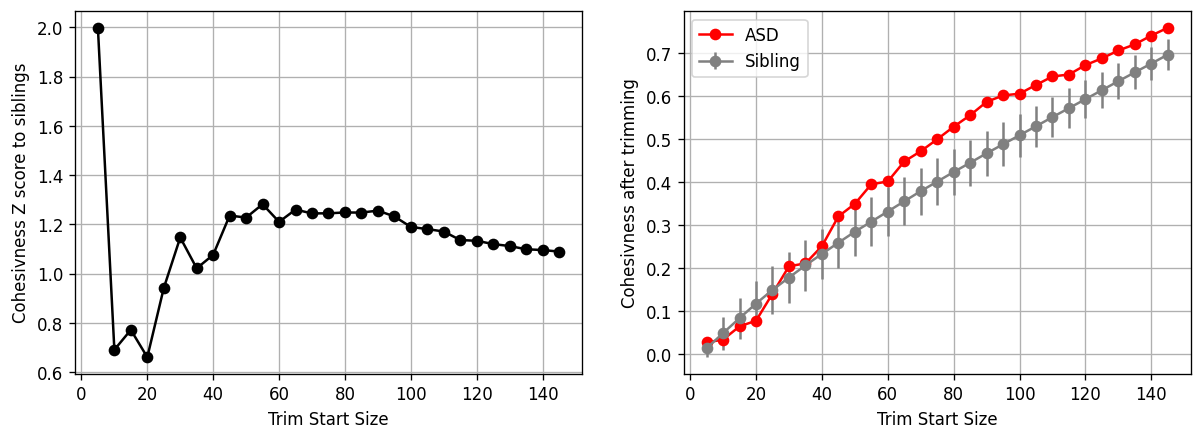

In [28]:
sibxx = [np.mean(x) for x in Sib_Cohes_info2]
yerr = [np.std(x) for x in Sib_Cohes_info2]
Zscores = []
for i, topN in enumerate(slices):
    Z, P = GetPermutationP(Sib_Cohes_info2[i], ASD_Cohes_info2[i])
    Zscores.append(Z)
ASD_Cohes_info2 = np.array(ASD_Cohes_info2)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(slices, ASD_Cohes_info2/sibxx, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings")
ax2.plot(slices, ASD_Cohes_info2, marker="o", color="red", label="ASD")
ax2.errorbar(slices, sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")
ax1.grid(True)
ax2.grid(True)

In [33]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_hippomask, 55, InfoDict)
print(len(CirSTRs), cohe, conn)
RegionDistributionsList(CirSTRs)

38 0.39489507574963817 310
Hippocampal_formation 	 1 	 Subiculum_dorsal_part
Olfactory_areas 	 4 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area; Piriform_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus
Isocortex 	 23 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_dorsal_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Primary_motor_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_trunk; Visceral_area; Anteromedial_visual_area; Lateral_visual_area; Pr